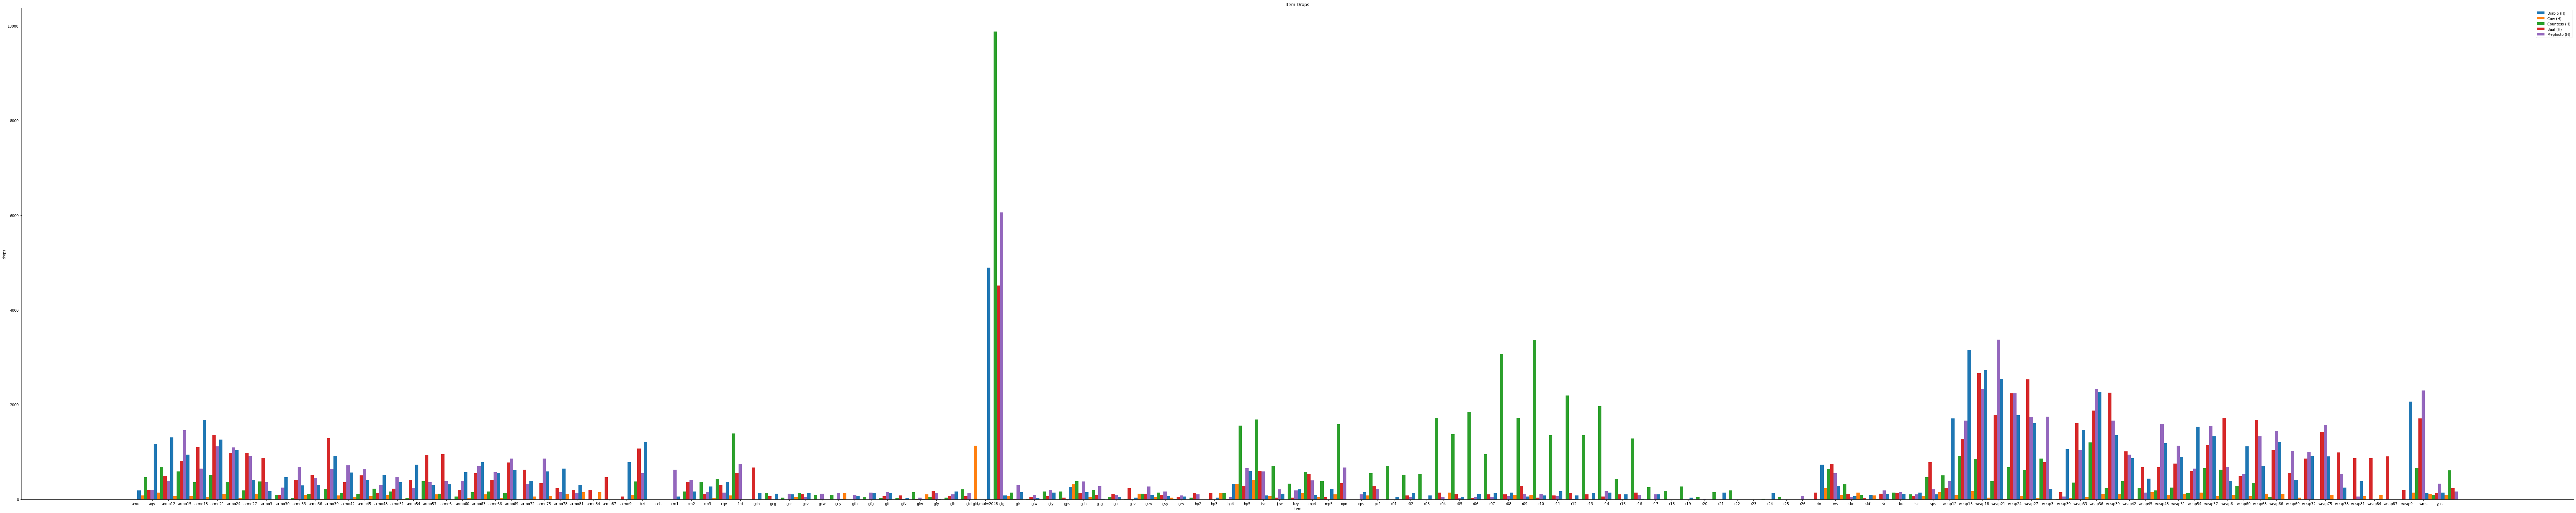

In [36]:
import json
import os
import matplotlib.pyplot as plt
from collections import OrderedDict
import numpy as np

path_to_json = './results/'
json_filenames = [path_to_json+pos_json for pos_json in os.listdir(path_to_json) if(pos_json.endswith('.json'))]
loot_dicts = []
for filename in json_filenames:
    file = open(filename)
    loot_dicts.append(json.load(file))
    file.close()

#normalize
for left in loot_dicts:
    loot_dict_left = left['loot']
    for right in loot_dicts:
        loot_dict_right = right['loot']
        for loot in loot_dict_right:
            if loot not in loot_dict_left:
                loot_dict_left[loot] = 0
#sort
sorted_loot_dicts = []
for e in loot_dicts:
    d = {}
    d['monster'] = e['monster']
    d['kills'] = e['kills']
    d['loot'] = dict(OrderedDict(sorted(e['loot'].items())))
    sorted_loot_dicts.append(d)

number_of_pair_bars = len(sorted_loot_dicts)
xticks = list(sorted_loot_dicts[0]['loot'].keys())
ind = np.arange(len(sorted_loot_dicts))
bar_width = 0.25

plt.figure(figsize=(100, 20))

# plot bars
width=0.2
i=1
for e in sorted_loot_dicts:
    sld = e['loot']
    #x = list(sld.keys())
    x_axis = np.arange(len(sld.keys()))
    y = list(sld.values())
    plt.bar(x_axis+width*i,height=y,width=width,label=e['monster'])
    i+=1

plt.xticks(x_axis,list(sld.keys()))
title = 'Item Drops'
plt.title(title)
plt.xlabel("item")
plt.ylabel("drops")
plt.tight_layout()
plt.legend()
plt.show()
